# Biometrics: Face recognition using LBP/PCA/LDA

In this project, we test/implement and report about a face recognition algorithm based on Principal Components Analysis (Eigenfaces), Linear Discriminant Analysis (Fisherfaces) and Local Binary Pattern (LBP). These procedures are representative of _old-school_ computer vision techniques that are still in use and retain their merits. All three generate feature vector descriptors that can be compared for verification/identifaction.

We evaluate each recognition performance on:
* three different representations (PCA/LDA/LBP)
* three (gradually more complex) databases of still images.

We discuss the results w.r.t. data and method

**Note: large parts of this notebook are based on the [PyImageSearch Gurus Course on Computer Vision](https://www.pyimagesearch.com/pyimagesearch-gurus/) by Adrian Rosebrock.**

## Eigenfaces for face recognition

In 1971 Goldstein et al. ([Identification of human faces](http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=1450184&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D1450184)) demonstrated that facial characteristics can be manually extracted, quantified and used for face recognition. The question then remained: could this be done in an automatic fashion? 

It wasn’t until the 1987 paper by Kirby and Sirovich ([A Low-Dimensional Procedure for the Characterization of Human Faces](https://gurus.pyimagesearch.com/wp-content/uploads/2015/10/kirby_1987.pdf)) that we were able to answer this question. This paper is considered to be a seminal work in the history of computer vision — and while other approaches have since been proposed that can outperform Eigenfaces, it’s still important that we take the time to understand and appreciate this algorithm. [Turk and Pentland](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwjmvqy6jqfhAhWFZFAKHb74DNgQFjAAegQIABAC&url=http%3A%2F%2Fwww.face-rec.org%2Falgorithms%2Fpca%2Fjcn.pdf&usg=AOvVaw2IlxVps8dldmeA01yQDa_I) built on this idea in the context of face recognition. 

The Eigenfaces algorithm uses Principal Component Analysis to construct a low-dimensional representation of face images.

![An example of applying an eigenvalue decomposition to a dataset of faces and extracting the 16 "eigenfaces" with the largest corresponding eigenvalue magnitude.](notebook_images/what_is_fr_eigenfaces.jpg)


This involves collecting a dataset of faces with multiple face images per person we want to identify — like having multiple training examples of an image class we would want to label in image classification. Given this dataset of face images (presumed to be the same width, height, and ideally — with their eyes and facial structures aligned at the same (x, y)-coordinates, we apply an eigenvalue decomposition of the dataset, keeping the eigenvectors with the largest corresponding eigenvalues.

Given these eigenvectors, a face can then be represented as a linear combination of what Kirby and Sirovich call eigenfaces.

Face identification can be performed by computing the Euclidean distance between the eigenface representations and treating the face identification as a k-Nearest Neighbor classification problem — however, we tend to commonly apply more advanced machine learning algorithms to the eigenface representations.

Last, it’s important to note that the Eigenfaces algorithm is **not-specific to faces** — we can actually apply it to any arbitrary dataset containing objects of the same type that need to be compared, whether that may be bicycles, cans of soup, or ancient Aztec coins. The Eigenfaces algorithm can be modified to accommodate each of these identification tasks.

## Fisherfaces for face recognition

From [Scholarpaedia](http://www.scholarpedia.org/article/Fisherfaces):
> When the goal is classification rather than representation, PCA may not yield the most desirable results. In such cases, one wishes to find a subspace that maps the sample vectors of the same class in a single spot of the feature representation and those of different classes as far apart from each other as possible. The techniques derived to achieve this goal are known as discriminant analysis (DA).
The most known DA is [Linear Discriminant Analysis (LDA)](http://www.scholarpedia.org/article/Linear_Discriminant_Analysis), which can be derived from an idea suggested by R.A. Fisher in 1936. When LDA is used to find the subspace representation of a set of face images, the resulting basis vectors defining that space are known as [Fisherfaces](http://www.scholarpedia.org/article/Fisherfaces).

![Example of FisherFaces](notebook_images/FisherFaces.jpg)

## LBP for face recognition

Local Binary Patterns, or LBPs for short, are a texture descriptor made popular by the work of Ojala et al. in their 2002 paper, [Multiresolution Grayscale and Rotation Invariant Texture Classification with Local Binary Patterns](http://www.outex.oulu.fi/publications/pami_02_opm.pdf) (although the concept of LBPs were introduced as early as 1993).

Unlike [Haralick texture features](http://haralick.org/journals/TexturalFeatures.pdf) that compute a global representation of texture based on the [Gray Level Co-occurrence Matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix), LBPs instead compute a local representation of texture. This local representation is constructed by comparing each pixel with its surrounding neighborhood of pixels. See [PyImageSearch](https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/) and [Scikit-Image](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html) for further details on LBP.
![LBP](notebook_images/LBP.png)

## Face Datasets

[From OpenCV Docs](https://docs.opencv.org/3.4/da/d60/tutorial_face_main.html):

In order to test face recognition systems, we need databases of labeled face images. For this reason, we can start with one of the available face databases, http://face-rec.org/databases/ that gives an up-to-date overview. Some interesting databases are:

* [AT&T Facedatabase](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html). Quoted from http://face-rec.org):
> The AT&T Facedatabase, sometimes also referred to as ORL (Olivetti Research Lab) Database of Faces or Olivetti faces, contains ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).The AT&T Facedatabase is good for initial tests, but it's a fairly easy database. The Eigenfaces method already has a 97% recognition rate on it, so we don't expect to see any great improvements with other algorithms.

This database can be accessed in a straightforward way through the [sklearn.datasets.fetch_olivetti_faces](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces) module. 
A preview of this database can be seen [here](https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html) 

* [The CALTECH Faces dataset](http://www.vision.caltech.edu/html-files/archive.html) is a popular benchmark dataset for face recognition algorithms. Overall, the dataset consists of 450 images of approximately 27 unique people. Each subject was captured under various lighting conditions, background scenes, and facial expressions. Furthermore, bounding box coordinates are provided to crop the faces prior to recognition. A routine (load_caltech_faces)is provided to read the data. 

![A sample of the CALTECH Faces dataset.](notebook_images/lbps_fr_caltech_faches.jpg)

* [The Labeled Faces in the Wild (lfw)](http://vis-www.cs.umass.edu/lfw/). This dataset is a collection of more than 13000 JPEG pictures of famous people collected over the internet. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. These images are completely unconstrained (pose, illumination, expression, occlusion).  The only constraint on these faces is that they were detected by the Viola-Jones face detector. Each picture is centered on a single face. A loader [sklearn.datasets.fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people) is provided by scikit-learn. 

## Overview

In this project, we test/implement and report about a face recognition algorithm based on Principal Components Analysis (Eigenfaces), Linear Discriminant Analysis (Fisherfaces), Local Binary Pattern (LBP). Below we analyze the performance of the different embedding representations on the different datasets.

#### Import the required Python packages

In [459]:
# local packages
from localmodules.datasets import load_faces
from localmodules.distance import L2_distance, KLD, CHI2, show_pair
from localmodules.local_binary_patterns import LBP
from sklearn.metrics import roc_curve, auc
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# sklearn packagees
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

import numpy as np
import cv2
from pathlib import Path

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt
%matplotlib inline

# the following package contains some handy routines for image manipulation
# they have been developed by Adrian Rosenbrock
# simply install this package in our environment using "conda install imutils"
# see https://www.pyimagesearch.com/opencv-tutorials-resources-guides/ for further info
import imutils

#### Input parameters

In [485]:
#nb>
# input parameters
# path to dataset for Caltech data
# point to correct directory
#caltechDataset = Path("../../../facesdata/CalTechFacesDirs")
caltechDataset = Path("CalTechFacesDirs")
# number of PCA/LDA components to retain
num_components = 35
# type of database (ATT/LFW/CALTECH)
#facesDB="ATT"
#facesDB = "LFW"
facesDB = "CALTECH"
# type of descriptor (PCA/LDA/LBP)
#DESC = "LBP"
#DESC = "PCA"
DESC = "LDA"
# max number of persons to extract from database
max_persons = 10

#### Import face image data sets (Olivetti (AT&T), Labeled Faces in the Wild, Caltech)

The data are returned as a list object with the following components:
* data: (NxM) matrix of N flattened (linear dimension M) images
* images: (Nx(nxm)) matrix of N images of dimension nxm 
* target: N-dimensional vector of labels 

In [486]:
# Download the data, if not already on disk and load it as numpy arrays
if facesDB == "ATT":
    faces = load_faces("ATT", dataset = None, min_faces=10, max_targets=max_persons)
elif facesDB == "LFW": 
    faces = load_faces("LFW", dataset = None, min_faces=10, max_targets=max_persons)
elif facesDB == "CALTECH":
    faces = load_faces("CALTECH", dataset = caltechDataset, min_faces=10, max_targets=max_persons)

#### Print statistics of data

In [487]:
# extract number of samples and image dimensions (for later display)
n_samples, h, w = faces.images.shape

# for machine learning we use the flattened data
X = faces.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = faces.target
# encode the labels to integers
le = LabelEncoder()
y = le.fit_transform(y) # y is a list with the labels sorted
n_classes = np.unique(y).shape[0] #n_classes is the number of different classes

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 169
n_features: 2914
n_classes: 10


#### Select PCA/LDA/LBP descriptor and calculate descriptor

In [488]:
# select the feature embedding mehtod (PCA, LDA, LBP)
# return the vector-coded embedding of the images
if DESC == "PCA":
    # Compute a PCA (eigenfaces) on the face dataset
    num_components = min(num_components, min(n_samples, n_features))
    print("num_components {n}".format(n=num_components))
    desc = PCA(n_components=num_components, svd_solver='randomized', whiten=True).fit(X)
    X_pca = desc.transform(X)
    embedded = X_pca

elif DESC == "LDA":
    num_components = min(num_components, min(n_samples, n_features))
    desc = LinearDiscriminantAnalysis(n_components=num_components).fit(X, y)
    X_lda = desc.fit_transform(X,y)
    embedded = X_lda

elif DESC == "LBP":
    desc = LBP(numPoints=8, radius=1, grid_x=7, grid_y=7)
    embedded = desc.describe_list(faces.images)
    #print(embedded)


In [489]:
print(embedded.shape)

(169, 9)


#### Compute pair-wise matching scores

In [490]:
distances = [] # distance between pairs
identical = [] # 1 if same identity, 0 otherwise

# num = n_samples
I = np.zeros((n_samples, n_samples))

for i in range(n_samples-1):
    for j in range(1, n_samples):
        if DESC == "LBP":
            # Kullback-Leibler Divergence for normalized histograms
#             distances.append(KLD(embedded[i], embedded[j]))
            # Better even: Chi-square distance
            distances.append(CHI2(embedded[i], embedded[j]))
        else:
            # Euclidean norm as distance
            distances.append(L2_distance(embedded[i], embedded[j]))
        if y[i] == y[j]:
            identical.append(1)
            I[i,j] =  I[j,i] = 1
        else:
            identical.append(0)

            
distances = np.array(distances)
# convert to normalized [0,1] score (the higher the better)
scores = (distances.max() - distances)/distances.max()
print(scores)
identical = np.array(identical)

[0.69319809 0.7030189  0.69416547 ... 0.75089431 1.         0.67165197]


#### Generate a genuine and impostor pair and display score
In this implementation only the L2-distance is displayed

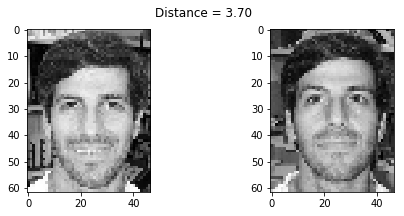

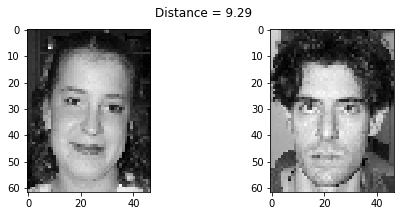

In [491]:
genuine = np.asarray(np.where(I == 1))
genuine = np.asarray(np.where(I == 1)).T
genuine_pair_id = np.random.randint(genuine.shape[0])

impostor = np.asarray(np.where(I == 0)).T
impostor_pair_id = np.random.randint(impostor.shape[0])

show_pair(faces, embedded, genuine[genuine_pair_id][0], genuine[genuine_pair_id][1])
show_pair(faces, embedded, impostor[impostor_pair_id][0], impostor[impostor_pair_id][1])

#### Compute F1 and accuracy scores for variable (and optimal) thresholds

* Calculate and plot F1 and accuracy scores for a range (min, max) of thresholds.
* Determine some optimal threshold (look up in classification literature)

Reference1: https://medium.com/datadriveninvestor/accuracy-trap-pay-attention-to-recall-precision-f-score-auc-d02f28d3299c
Reference2: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [492]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

# set threshold range
# thresholds =  ...
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

acc_scores=[]
f1_scores=[]

for i in range(len(thresholds)):
    scores_predicted=[]
    for j in range(len(scores)):
        if scores[j]>thresholds[i]:
            scores_predicted.append(1)
        elif scores[j]<thresholds[i]:
            scores_predicted.append(0)

    f1Score = f1_score(identical,scores_predicted)
    f1_scores.append(f1Score)        
    acc = accuracy_score(identical,scores_predicted)
    acc_scores.append(acc)
    

print(acc_scores)    
print(f1_scores)

[0.12227182539682539, 0.1423611111111111, 0.2437641723356009, 0.5289824263038548, 0.824015022675737, 0.9658092403628118, 0.9869260204081632, 0.94093679138322, 0.888499149659864]
[0.21427891782168798, 0.2182029584652154, 0.24042704626334518, 0.3369576059850374, 0.5762306970395017, 0.8738726963795582, 0.9435348125478195, 0.672688003141567, 0.1280133000831255]


#### Calculate genuine and impostor scores

In [493]:
#calculate genuine and impostor according to the scores acquired frim deifferent thresholds 
genuine = []
impostor = []
for i in range(len(scores)):
    if identical[i] == 1:
        genuine.append(scores[i])
    else:
        impostor.append(scores[i])

### Optimal Thresholds:

In general the optimal thresholds in all the plots presenting F1 score and accuracy, are selected in the position where both F1 score and accuracy are maximized at the same time. This is presented in the plots with a dashed vertical line.  


# Olivetti_faces Database (ATT)

LPB, PCA and LDA are applied initially for the ATT database. Judging from the results occured and as they are vizualised on the plots, LDA outperforms all the other techniques. LDA maximizes the between-class variance relative to the within-class variance and this is something visible also in the genuine and impostor scores plot for example where small overlaps are presented in the case of LDA, while on the other hand PCA has the worst perfomance.

###  Descriptor = Local Binary Patterns 'LBP'

Text(0.5, 1.0, 'F1 score - Accuracy, LBP descriptor - ATT Database ')

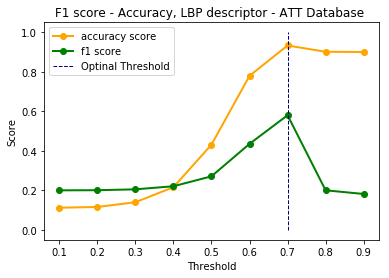

In [30]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.7, 0.7], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, LBP descriptor - ATT Database ")

- f1_scores = [0.20020475486292796, 0.20086738187628395, 0.20531964535697622, 0.22088353413654618, 0.2711535350266947, 0.43531694695989653, 0.5802371541501976, 0.20040899795501022, 0.18181818181818182]

- acc_scores = [0.11235955056179775, 0.11602070445650801, 0.14000757480116147, 0.21626057315995456, 0.4312586794596642, 0.7795732862012372, 0.9329630097209948, 0.9012750915288473, 0.9000126246686024]

- Optimal Threshold = 0.7

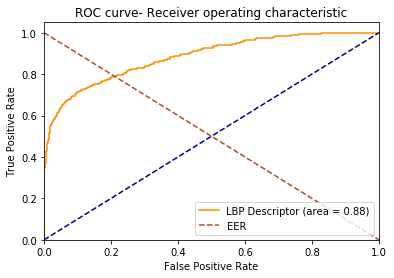

Equal Error Rate = 0.21136363636363623


In [164]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='LBP Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

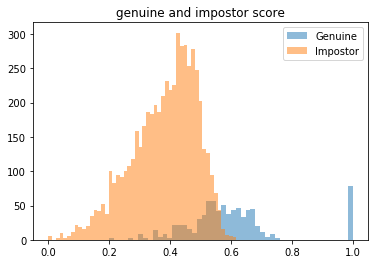

In [55]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

### Descriptor = 'PCA - Principal Components Analysis (Eigenfaces)'

Text(0.5, 1.0, 'F1 score - Accuracy, PCA descriptor - ATT Database ')

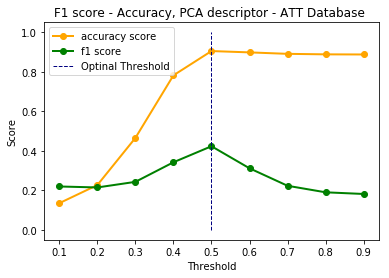

In [40]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.5, 0.5], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, PCA descriptor - ATT Database ")

- accuracy scores= [0.13523473802275277, 0.2268867168722961, 0.4653100464669124, 0.7819259734016984, 0.9048229450408588, 0.898093254286172, 0.8907226406024675, 0.8881589488863965, 0.8875180259573786]

- f1_scores= [0.21974844585803094, 0.21480878763222133, 0.24313903379451124, 0.34219429676172064, 0.4233009708737864, 0.3116883116883117, 0.22323462414578588, 0.1902552204176334, 0.18181818181818182]

- Optimal Threshold = 0.5

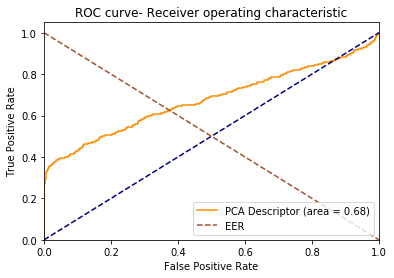

Equal Error Rate = 0.37608294276447163


In [175]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='PCA Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

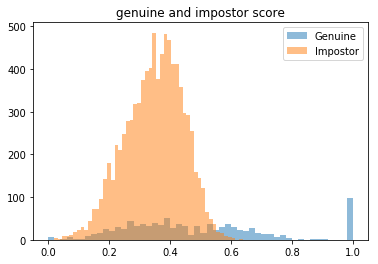

In [66]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

### Descriptor = 'LDA - Linear Discriminant Analysis (Fisherfaces)' 

Text(0.5, 1.0, 'F1 score - Accuracy, LDA descriptor - ATT Database ')

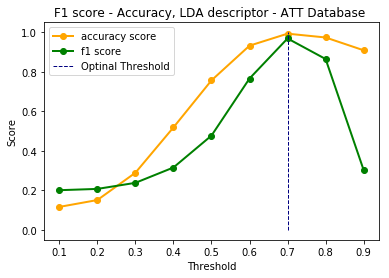

In [60]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.7, 0.7], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, LDA descriptor - ATT Database ")

- accuracy_scores= [0.1163994445145815, 0.15111728317131676, 0.2891049109960864, 0.5184951395025881, 0.7564701426587552, 0.9320792829188234, 0.992803938896604, 0.9734881959348567, 0.9087236460042923]

- f1_scores= [0.20093617992921567, 0.20744931636020747, 0.2381274523068597, 0.31575170434158595, 0.4770940634318243, 0.7658833768494344, 0.9685603971318256, 0.8645161290322582, 0.30279652844744454]

- Optimal Threshold = 0.7

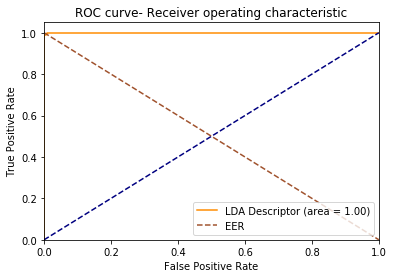

Equal Error Rate = 0.006818181818181401


In [188]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='LDA Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

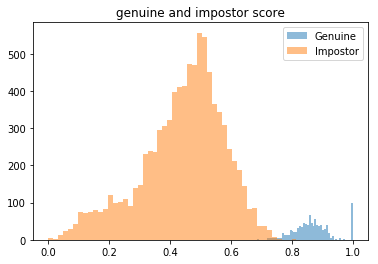

In [76]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

# Labeled Faces in the Wild (LFW)

LPB, PCA and LDA are applied again for the case of LFW database this time. Again, it is visible that LDA outperforms all the other techniques. 

### Descriptor = Local Binary Patterns 'LBP'

Text(0.5, 1.0, 'F1 score - Accuracy, LBP descriptor - LFW Database ')

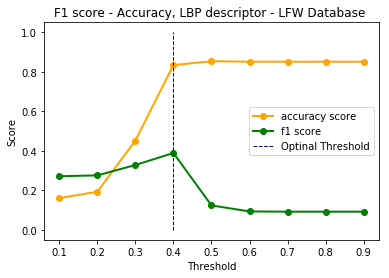

In [52]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.4, 0.4], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='center right')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, LBP descriptor - LFW Database ")

- accuracy_scores=[0.16082978847386517, 0.19317056115610978, 0.4520715576015384, 0.8337509469145155, 0.8534467688363149, 0.8509993590117126, 0.8508828156867315, 0.8508828156867315, 0.8508828156867315]

- f1_score= [0.2716099337413383, 0.27591256144754733, 0.3283091649403529, 0.3892100192678227, 0.12399860675722742, 0.0935838355193194, 0.09223128769067046, 0.09223128769067046, 0.09223128769067046]

- Optimal Threshold = 0.4 

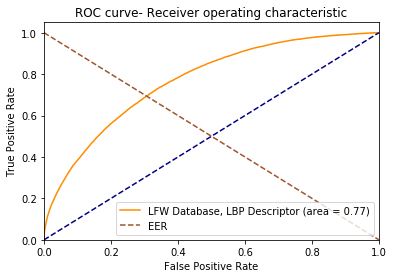

Equal Error Rate = 0.3060182012328615


In [198]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='LFW Database, LBP Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

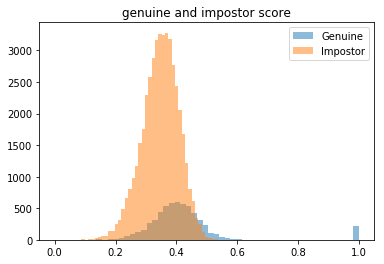

In [86]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

### Descriptor = 'PCA - Principal Components Analysis (Eigenfaces)'

Text(0.5, 1.0, 'F1 score - Accuracy, PCA descriptor - LFW Database ')

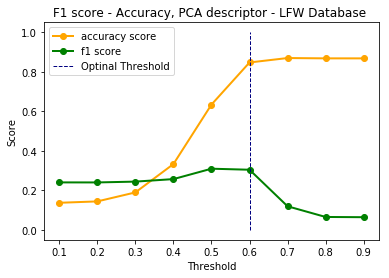

In [54]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.6, 0.6], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, PCA descriptor - LFW Database ")

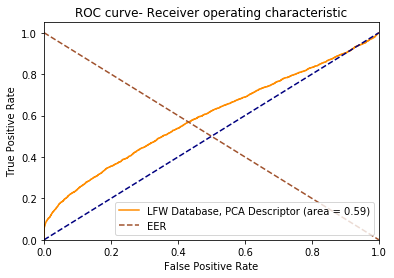

Equal Error Rate = 0.4307570037750855


In [208]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='LFW Database, PCA Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

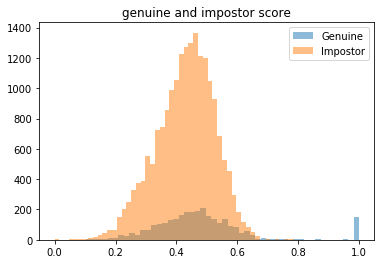

In [96]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

### Descriptor = 'LDA - Linear Discriminant Analysis (Fisherfaces)' 

Text(0.5, 1.0, 'F1 score - Accuracy, LDA descriptor - LFW Database ')

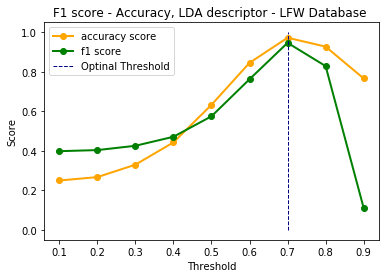

In [74]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.7, 0.7], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, LDA descriptor - LFW Database ")

- accuracy_scores = [0.25001084300770576, 0.26709942315199003, 0.3300466972198528, 0.4427995200161922, 0.6327979297083954, 0.8452630513669418, 0.9722419002732438, 0.9272361896225187, 0.7663693272998019]

- f1_scores=[0.3983019393152083, 0.40383846461415435, 0.42563212692117003, 0.4711790452930119, 0.5748053904745961, 0.7622559363824163, 0.9463747067366776, 0.8288153464167886, 0.1111111111111111]

- Optimal_Threshold = 0.7

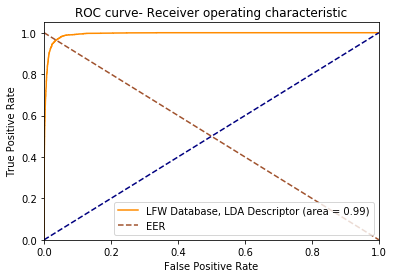

Equal Error Rate = 0.03578947368434116


In [220]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='LFW Database, LDA Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

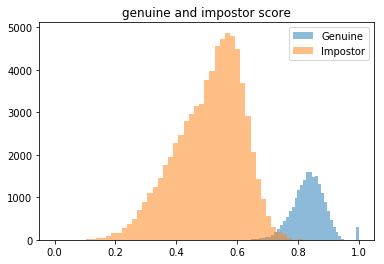

In [106]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

# CALTECH_faces Database (CALTECH)

Finally, LPB, PCA and LDA are applied for the CALTECH database. LDA has again the same good perfomance, whereas PCA again seems to be a bad choice.

### Descriptor = Local Binary Patterns 'LBP'

Text(0.5, 1.0, 'F1 score - Accuracy, LBP descriptor - CALTECH Database ')

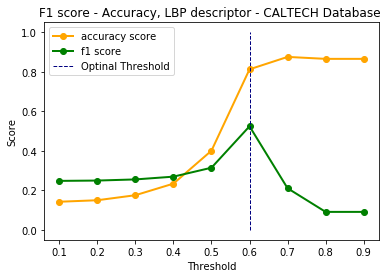

In [32]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.6, 0.6], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, LBP descriptor - CALTECH Database ")

- accuracy_scores= [0.14253320375769354, 0.15012263408764867, 0.1755749919015225, 0.2341616918876394, 0.4008514970614096, 0.8124392614188533, 0.8752371696978111, 0.8653338886575038, 0.8653338886575038]

- f1_scores= [0.2480418814171503, 0.24970380357069902, 0.2554436410749363, 0.269456584116894, 0.31464718649092166, 0.524239934264585, 0.21077283372365338, 0.09119300437226735, 0.09119300437226735]

- Optimal_Threshold = 0.6


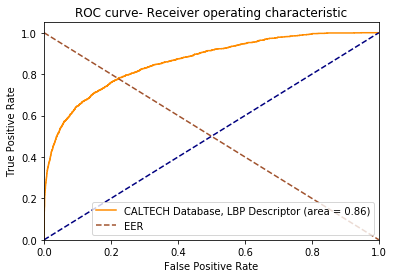

Equal Error Rate = 0.22153985781273636


In [231]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='CALTECH Database, LBP Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

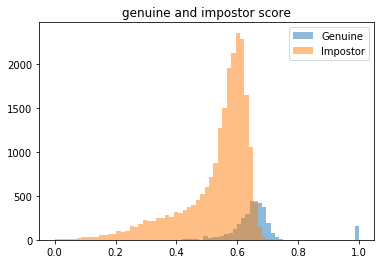

In [116]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

### Descriptor = 'PCA - Principal Components Analysis (Eigenfaces)'

Text(0.5, 1.0, 'F1 score - Accuracy, PCA descriptor - CALTECH Database ')

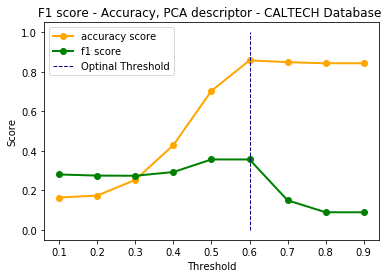

In [62]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.6, 0.6], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, PCA descriptor - CALTECH Database ")

- accuracy_scores= [0.1639324559822126, 0.1738477254972658, 0.2534703443302686, 0.4296015864431224, 0.703743765398714, 0.8576407667808424, 0.8486869779460369, 0.8430382789495824, 0.8430382789495824]

- f1_scores= [0.2804985261415938, 0.27474150664697194, 0.2740606556419097, 0.29280286097451946, 0.35656486557034717, 0.35642488454224397, 0.149898717083052, 0.08926080892608089, 0.08926080892608089]

- Optimal Threshold = 0.6 

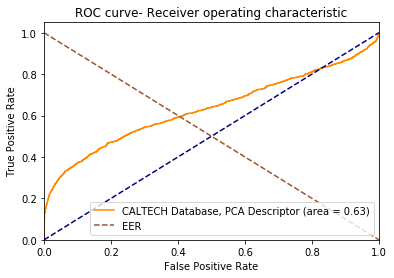

Equal Error Rate = 0.40493146489103626


In [243]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='CALTECH Database, PCA Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

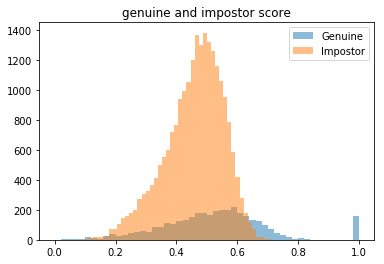

In [129]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

### Descriptor = 'LDA - Linear Discriminant Analysis (Fisherfaces)' 

Text(0.5, 1.0, 'F1 score - Accuracy, LDA descriptor - CALTECH Database ')

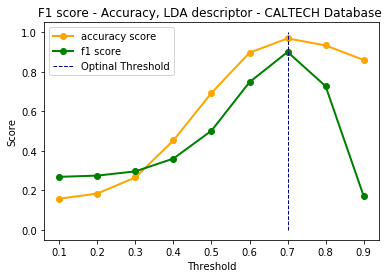

In [86]:
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, acc_scores, 'o-', color='orange', linewidth=2.0, label='accuracy score')
plt.plot(thresholds, f1_scores, 'o-', color='green', linewidth=2.0, label='f1 score')
plt.plot([0.7, 0.7], [0, 1.0], color='navy', linewidth=1.0, linestyle='--', label='Optinal Threshold')
plt.legend(loc='upper left')  
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.title("F1 score - Accuracy, LDA descriptor - CALTECH Database ")

- accuracy_scores = [0.15784440953486784, 0.18414042756642307, 0.26535072740932997, 0.4528379209070419, 0.6931220545044737, 0.8963868588211188, 0.9688545864353528, 0.9332012840652961, 0.859913940304624]

- f1_scores = [0.26850972947318463, 0.27478598749316985, 0.2961654233739039, 0.36101140623753686, 0.5018294711165318, 0.7474612951556516, 0.900218818380744, 0.7271205357142856, 0.1713131313131313]

- Optimal_Threshold = 0.7

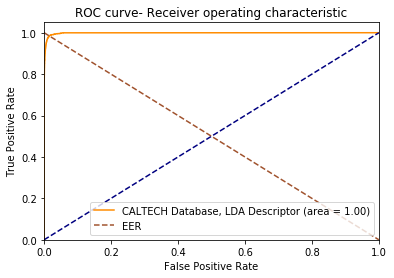

Equal Error Rate = 0.015659955257270694


In [260]:
fpr, tpr, thresholds = roc_curve(identical, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='CALTECH Database, LDA Descriptor (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='sienna', linestyle='--', label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve- Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate the EER for each case
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate =', eer)

#### Plot genuine and impostor scores

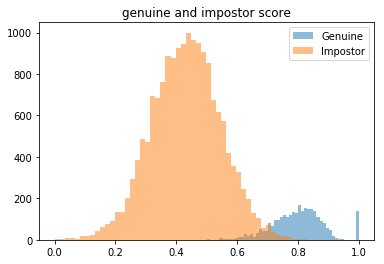

In [139]:
plt.hist(genuine, bins=50,alpha=0.5)
plt.hist(impostor, bins=50,alpha=0.5)
plt.legend(['Genuine', 'Impostor'])
plt.title('genuine and impostor score')
plt.show()

## Classification secenario

In a more general classification scenario one can use the feature representations to build more complex classifiers (SVM, NN, etc.). Testing then requires a splitting in training and validation subsets. 

Below, KNN, SVM and Multi Layer Perceptron classifiers are applied and then their validation results (for all databases and all descriptors) are presented. 

In [494]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import average_precision_score

targets = y

encoder = LabelEncoder()
d=encoder.fit(targets)

# Numerical encoding of identities
y_enc = encoder.transform(targets)

X_train, X_test, y_train, y_test = train_test_split(embedded, y_enc, test_size=0.25, random_state=42)


#KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

#SVM classifier
svc = LinearSVC()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), 
                   param_grid, cv=5)
svm.fit(X_train, y_train)

#MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)


knn_prediction = knn.predict(X_test)
svm_prediction = svm.predict(X_test)
mlp_prediction = mlp.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_prediction)
svm_accuracy = accuracy_score(y_test, svm_prediction)
mlp_accuracy = accuracy_score(y_test, mlp_prediction)

Given the features computed by LBP, PCA, LDA various classifiers make predictions to whom these features belong. Subsequently, we compute some metrics for these predictions.

**Precision:** TP/TP+FP (or TP/ Actual Results): Out of all the predicted positives, how many are correctly predicted as positives.

**Recall:** TP/TP+FN (or TP/ Predicted Results): Out of all the actual positives, how many we predicted as positives

# Olivetti_faces Database (ATT)

In this database, here we see that when using LBP descriptor, we are getting good results for all classifiers. With LDA the results are perfect we good say, and with PCA are relatively good but not that good.  

###  Descriptor = Local Binary Patterns 'LBP'

In [393]:
print('KNN accuracy:', knn_accuracy)
print('SVM accuracy:', svm_accuracy)
print('MLP accuracy:', mlp_accuracy)

KNN accuracy: 1.0
SVM accuracy: 1.0
MLP accuracy: 0.96


#### Classification Reports

In [394]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [395]:
from sklearn.metrics import classification_report
print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

SVM prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [396]:
from sklearn.metrics import classification_report
print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

Multi Layer Perceptron prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         1

   micro avg       0.96      0.96      0.96        25
   macro avg       0.97      0.97      0.97        25
weighted avg       0.97      0.96      0.96        25



### Descriptor = 'PCA - Principal Components Analysis (Eigenfaces)'

In [365]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 0.782608695652174
SVM accuracy 0.8695652173913043
MLP accuracy 0.782608695652174


#### Classification Reports

In [379]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      0.50      0.67         2
           4       1.00      0.33      0.50         3
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       0.50      1.00      0.67         2

   micro avg       0.78      0.78      0.78        23
   macro avg       0.86      0.78      0.76        23
weighted avg       0.88      0.78      0.77        23



In [380]:
from sklearn.metrics import classification_report
print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

SVM prediction

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2

   micro avg       0.87      0.87      0.87        23
   macro avg       0.82      0.85      0.82        23
weighted avg       0.83      0.87      0.84        23



In [381]:
from sklearn.metrics import classification_report
print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

Multi Layer Perceptron prediction

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         2
           6       0.50      0.33      0.40         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         2

   micro avg       0.78      0.78      0.78        23
   macro avg       0.82      0.80      0.78        23
weighted avg       0.83      0.78      0.78        23



### Descriptor = 'LDA - Linear Discriminant Analysis (Fisherfaces)' 

In [407]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 1.0
SVM accuracy 1.0
MLP accuracy 1.0


#### Classification Reports

In [408]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

SVM prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00   

# Labeled Faces in the Wild (LFW)

In this database, the results are moderate for LBP and bad for PCA, almost for all classifiers, whereas LDA has excellent perfomace again. It is worth mentioning here also that for this database the worst results were recorded in general. 

###  Descriptor = Local Binary Patterns 'LBP'

In [420]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 0.676056338028169
SVM accuracy 0.7183098591549296
MLP accuracy 0.6619718309859155


#### Classification Reports

In [421]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.87      0.59      0.70        22
           2       0.50      0.62      0.56         8
           3       0.80      0.80      0.80         5
           4       0.91      0.77      0.83        13
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         6
           7       0.53      1.00      0.70         8
           8       0.17      0.33      0.22         3
           9       1.00      0.33      0.50         3

   micro avg       0.68      0.68      0.68        71
   macro avg       0.64      0.58      0.58        71
weighted avg       0.77      0.68      0.69        71

SVM prediction

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.78      0.82      0.80        22
           2       0.60      0.75      0.67   

### Descriptor = 'PCA - Principal Components Analysis (Eigenfaces)'

In [437]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 0.4716981132075472
SVM accuracy 0.6037735849056604
MLP accuracy 0.6226415094339622


#### Classification Reports

In [438]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.00      0.00      0.00         4
           2       0.17      0.20      0.18         5
           3       0.50      0.67      0.57         3
           4       0.50      0.75      0.60         4
           5       0.56      0.64      0.60        14
           6       0.00      0.00      0.00         3
           7       0.75      0.50      0.60         6
           8       0.33      0.17      0.22         6
           9       1.00      0.50      0.67         2

   micro avg       0.47      0.47      0.47        53
   macro avg       0.43      0.43      0.40        53
weighted avg       0.44      0.47      0.44        53

SVM prediction

              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.33      0.25      0.29         4
           2       0.50      0.40      0.44   

### Descriptor = 'LDA - Linear Discriminant Analysis (Fisherfaces)' 

In [457]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 0.9811320754716981
SVM accuracy 0.9811320754716981
MLP accuracy 0.9811320754716981


#### Classification Reports

In [458]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       0.86      1.00      0.92         6

   micro avg       0.98      0.98      0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

SVM prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00   

# CALTECH_faces Database (CALTECH)

Finally, for another time LDA proved to be the best choice and for this database, too, noting very good metric results for all classifiers.

###  Descriptor = Local Binary Patterns 'LBP'

In [470]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 0.9285714285714286
SVM accuracy 0.9285714285714286
MLP accuracy 0.8809523809523809


#### Classification Reports

In [471]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00         4
           5       1.00      0.86      0.92         7
           6       1.00      0.86      0.92         7
           7       1.00      1.00      1.00         4

   micro avg       0.93      0.93      0.93        42
   macro avg       0.95      0.94      0.94        42
weighted avg       0.94      0.93      0.93        42

SVM prediction

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.80      0.89         5
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         6
           4       0.80      1.00      0.89   

### Descriptor = 'PCA - Principal Components Analysis (Eigenfaces)'

In [482]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 0.7777777777777778
SVM accuracy 0.9259259259259259
MLP accuracy 0.9259259259259259


#### Classification Reports

In [483]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.60      1.00      0.75         6
           2       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.83      0.83      0.83         6
           7       0.67      0.67      0.67         3

   micro avg       0.78      0.78      0.78        27
   macro avg       0.59      0.62      0.59        27
weighted avg       0.73      0.78      0.74        27

SVM prediction

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00   

### Descriptor = 'LDA - Linear Discriminant Analysis (Fisherfaces)' 

In [495]:
print('KNN accuracy', knn_accuracy)
print('SVM accuracy', svm_accuracy)
print('MLP accuracy', mlp_accuracy)

KNN accuracy 1.0
SVM accuracy 0.9767441860465116
MLP accuracy 0.9767441860465116


#### Classification Reports

In [496]:
from sklearn.metrics import classification_report
print("KNN prediction\n")
print(classification_report(y_test,knn_prediction))

print("SVM prediction\n")
print(classification_report(y_test,svm_prediction))

print("Multi Layer Perceptron prediction\n")
print(classification_report(y_test,mlp_prediction))

KNN prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

SVM prediction

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00   